<a href="https://colab.research.google.com/github/Sana-Shah-een/Artificial_Intelligence/blob/main/16_SuperMarketSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Load the dataset (Assuming the dataset is a CSV file)
df = pd.read_csv("/content/supermarket_sales.csv")

# Display the first few rows of the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Check the structure of the dataset
df.info()

# Display summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [5]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Handle any missing values (if any exist)
df.dropna(inplace=True)  # or use df.fillna(method='ffill') for forward fill

**Exploratory Data Analysis¶**

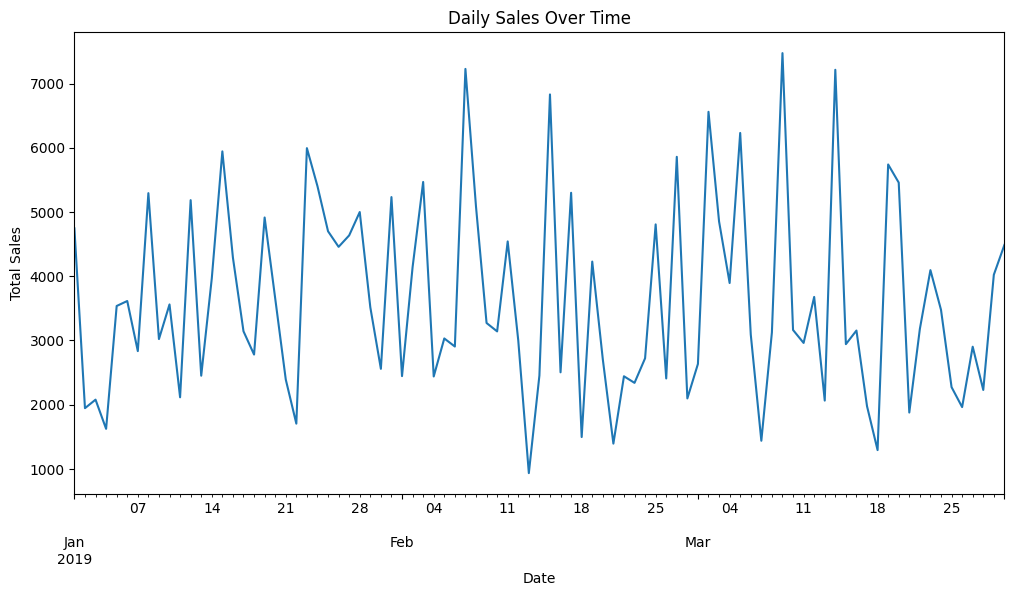

In [6]:
# Group by Date and sum up the sales
daily_sales = df.groupby('Date')['Total'].sum()

# Plot sales over time
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

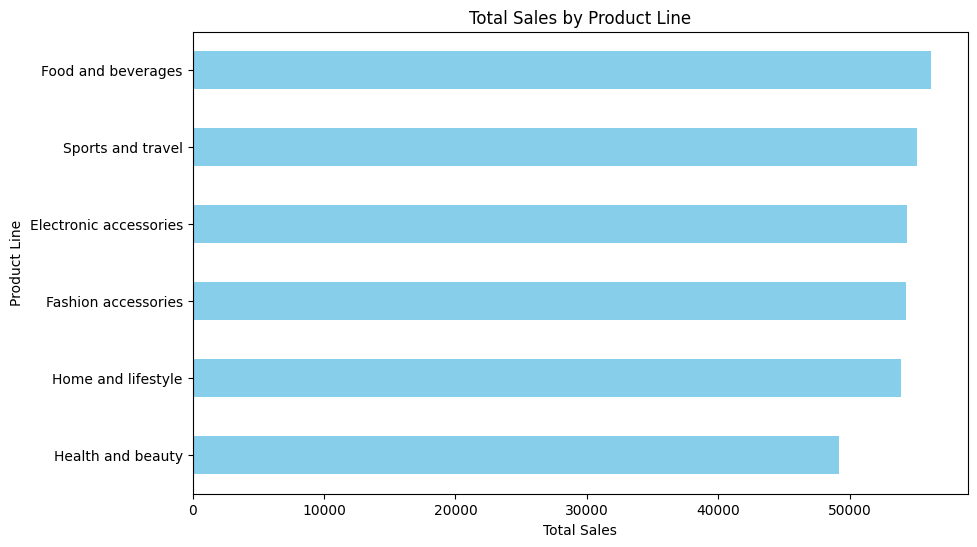

In [7]:
# Group by Product line and calculate total sales
product_sales = df.groupby('Product line')['Total'].sum().sort_values()

# Plot sales by product line
plt.figure(figsize=(10, 6))
product_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()


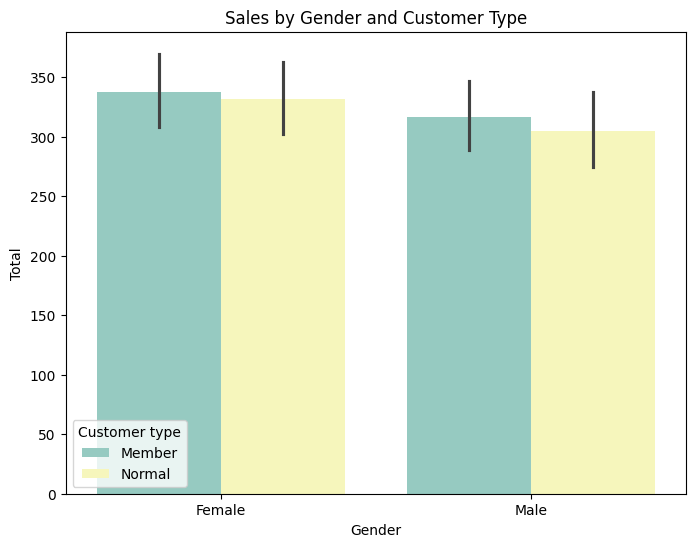

In [8]:
# Sales by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Total', hue='Customer type', data=df, palette='Set3')
plt.title('Sales by Gender and Customer Type')
plt.show()

<ipython-input-9-f7a10d121889>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='Set2')


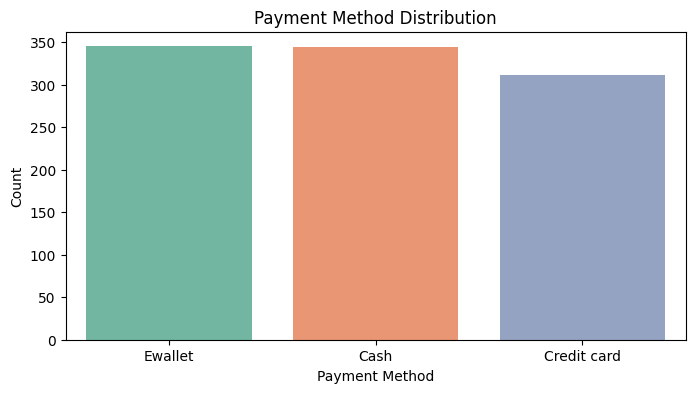

In [9]:
# Payment method distribution
payment_method_counts = df['Payment'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='Set2')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

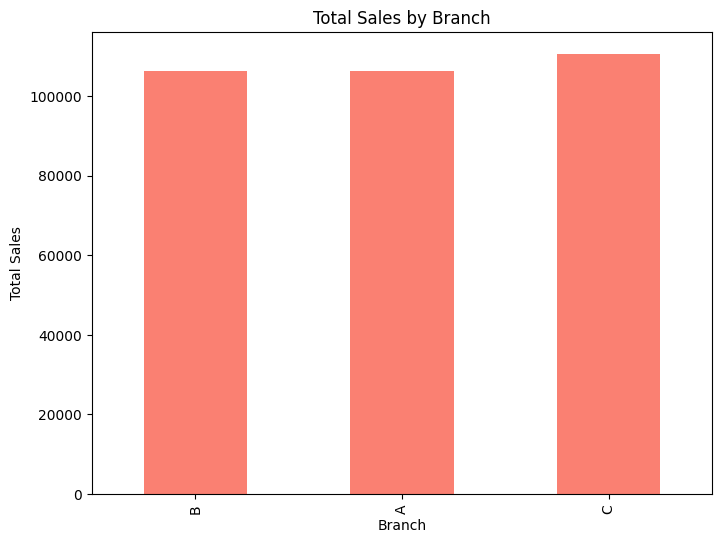

In [11]:
# Total sales by branch
branch_sales = df.groupby('Branch')['Total'].sum().sort_values()

# Plot total sales by branch
plt.figure(figsize=(8, 6))
branch_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

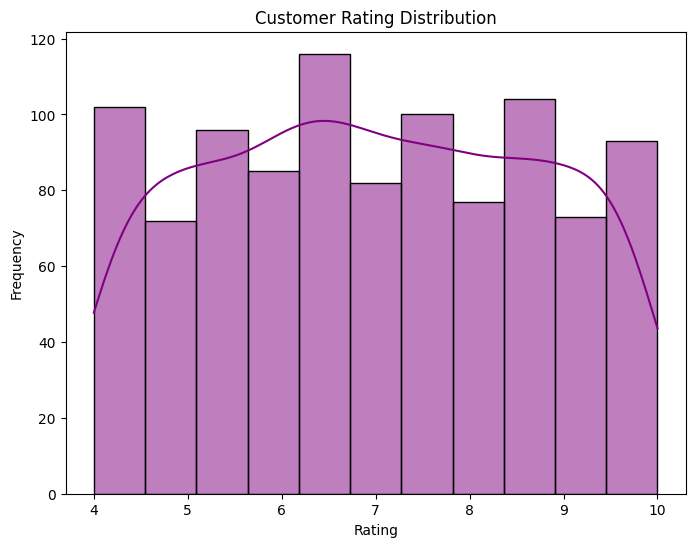

In [12]:
# Distribution of customer ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], kde=True, color='purple')
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()